 # Projet 6 Classification automatique de biens de consommation



##  Part 1  Analyse du texte . Faisabilité.

## 1 Preliminary

Réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

### 1.1 Contexte

analyse du fichier : flipkart_com-ecommerce_sample_1050.csv


###  1.2 Requirements¶

pandas\
numpy\
matplotlib\
seaborn    
nltk


### 1.3 Import

In [4]:
pip install stop-words

  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32918 sha256=5ca0af0e88359c2b8963064d349507e3f9124c728ea3fca66a11c9e6c50216ca
  Stored in directory: c:\users\serge\appdata\local\pip\cache\wheels\a3\2e\75\cb00ac68fe0eda6689c314cf87dee032f37bab4f9f4311d7fe
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [8]:

### builtin
import os,sys,time,random

# data
import pandas as pd
import numpy as np
import string
# NLP
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words


#sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics import roc_curve,auc,confusion_matrix, accuracy_score

# import spacy

# sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image


from sklearn.preprocessing import LabelEncoder
from sklearn import manifold
import string



In [9]:
# stop word de nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.4 Graphics and options

In [10]:
# lignes et colonnes affichées
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

# to set the figures background to white
plt.rcParams['figure.facecolor']='w'




### 1.5 Loading data

In [11]:
# lit fichier csv et stocke dans df

df = pd.read_csv(r"C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P6\Flipkart\flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

### 1.6 Dysplay

In [12]:
df.head(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstrac...",CRNEG7BKMFFYHQ8Z,1899.00,899.00,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value..."
7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cot...",BTWEGFZHGBXPHZUH,600.00,449.00,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""val..."
64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotto...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""valu..."
d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt...,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL ...",BDSEJT9UQWHDUBH4,2699.00,1299.00,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""SANTOSH ROYAL FASHION""}, {""key""=>""Machine ..."
6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v...,Jaipur Print Cotton Floral King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Flo...",BDSEJTHNGWVGWWQU,2599.00,698.00,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...",No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Brand"", ""value""..."


In [13]:
df.tail(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=ST...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",STIE88ZGTX65GH4V,1399.00,999.00,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""},..."
fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZD5GDCVQ,4930.00,1896.00,fd6cbcc22efb6b761bd564c28928483c.jpg,False,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\...",No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""},..."
5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5u...,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE5UVGW2JWVWCT,4500.00,1449.00,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberly...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""},..."
c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZGFD3RCE,3465.00,1333.00,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker ...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""},..."
f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-sticker/p/itme2zepqqzr9jt5?pid=STIE2ZEPACRQJKH7,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE2ZEPACRQJKH7,1190.00,595.00,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 online. Uberlyfe Large Vinyl Sticker at best prices ...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Package"", ""value""=>""Sticker""}, {""key""=>""Brand"", ""value..."


In [14]:
df.sample(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
94a0d2804a77f7d2bfab6f3f0ae5254d,2015-12-01 06:13:00 +0000,http://www.flipkart.com/nike-original-combo-set/p/itme8x8xp7mqsdwu?pid=CAGE8X8XDEUHD3JS,Nike Original Combo Set,"[""Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Nike Combos""]",CAGE8X8XDEUHD3JS,500.00,400.00,94a0d2804a77f7d2bfab6f3f0ae5254d.jpg,False,Flipkart.com: Buy Nike Original Combo Set online only for Rs. 400 from Flipkart.com. Only Genuin...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of Contents in Set"", ""value""=>""2""}, {""key""=>""Gift Set..."
c417f408340252f170f05dadf88160d7,2016-01-01 13:15:34 +0000,http://www.flipkart.com/arabian-nights-soex-cranberry-assorted-hookah-flavor/p/itmeyqzpswph4pq2?...,Arabian Nights Soex Cranberry Assorted Hookah Flavor,"[""Home Decor & Festive Needs >> Table Decor & Handicrafts >> Table Decor >> Hookah & Hookah Flav...",HOFEYQZPKEMRTVHH,800.00,800.00,c417f408340252f170f05dadf88160d7.jpg,False,Arabian Nights Soex Cranberry Assorted Hookah Flavor (500 g)\r\n Price: ...,No rating available,No rating available,Arabian Nights,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Arabian Nights""}, {""key""=>""Flavor"", ""value..."
503bb08f7bdf6a395ec564dd1dc83619,2015-12-12 11:46:53 +0000,http://www.flipkart.com/nutcase-sticker-wrap-design-lucky-elements-800-ml-bottle/p/itmeanchuu7rp...,Nutcase Sticker Wrap Design - Lucky Elements 800 ml Bottle,"[""Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water...",BOTEANCHDNKDTKGH,799.00,399.00,503bb08f7bdf6a395ec564dd1dc83619.jpg,False,"Nutcase Sticker Wrap Design - Lucky Elements 800 ml Bottle (Pack of 1, Multicolor)\r\n ...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Body Material"", ""value""=>""Aluminium""}, {""key""=>""Type"", ""valu..."
cd089e2ef349a7f00dcdbf28965914f6,2016-01-07 05:50:25 +0000,http://www.flipkart.com/lapguard-hp-pavilion-dv5-1008ax-6-cell-laptop-battery/p/itmdqdyjprqfhhzz...,Lapguard HP Pavilion dv5-1008ax 6 Cell Laptop Battery,"[""Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries""]",ACCDQDYBYVQZNHCH,3999.00,1699.00,cd089e2ef349a7f00dcdbf28965914f6.jpg,False,Buy Lapguard HP Pavilion dv5-1008ax 6 Cell Laptop Battery only for Rs. 0.0 from Flipkart.com. On...,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""In The Box"", ""value""=>""Laptop Battery""}, {""key""=>""Brand"", ""v..."
e15195f2a5ebaa2168ccd65324e65e8e,2016-01-07 05:50:25 +0000,http://www.flipkart.com/fluid-fs201-bl01-analog-digital-watch-women/p/itmduk7dks6ajzyk?pid=WATDU...,Fluid FS201-BL01 Analog-Digital Watch - For Women,"[""Watches >> Wrist Watches >> Fluid Wrist Watches""]",WATDUK7DKS6AJZYK,999.00,999.00,e15195f2a5ebaa2168ccd65324e65e8e.jpg,True,Fluid FS201-BL01 Analog-Digital Watch - For Women - Buy Fluid FS201-BL01 Analog-Digital Watch ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Other Functions"", ""value""=>""Neon Illuminator""}, {""key""=>""Ala..."


### 1.7 Structure

In [15]:
df.shape

(1050, 14)

In [16]:
df.dtypes

crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [17]:
df.dtypes.value_counts()

object     11
float64     2
bool        1
dtype: int64

In [18]:
df.nunique()

crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [19]:
df.describe(include='all')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1049.00,1049.00,1050,1050,1050,1050,1050,712,1049
unique,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",CRNEG7BKMFFYHQ8Z,NaN,NaN,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Capacity"", ""value""=>""5...."
freq,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,2186.20,1584.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7639.23,7475.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,35.00,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,555.00,340.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,999.00,600.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1999.00,1199.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.8 NaN and duplicated

In [20]:
df.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

<Axes: ylabel='uniq_id'>

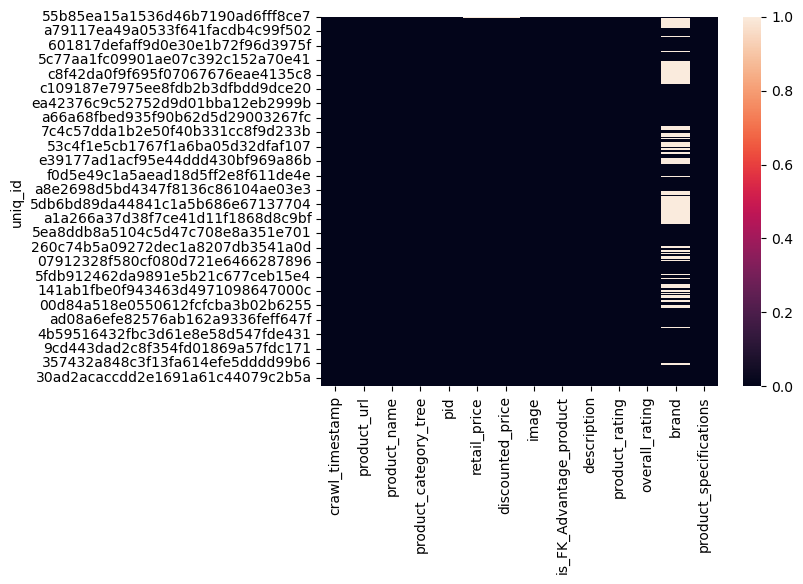

In [21]:
sns.heatmap(df.isna())

In [22]:
df[['product_name','description','image','product_category_tree']].isna().sum()

product_name             0
description              0
image                    0
product_category_tree    0
dtype: int64

Il n'y a pas de valeurs manquantes dans les colonnes que je conserve pour la suite.

## 2 Exploratory Data Analysis

La variable description contient le texte que nous devons nettoyer .
Le nom de produit 
la categorie est reprise dans product_category_tree  

### 2.1 Description

<Axes: >

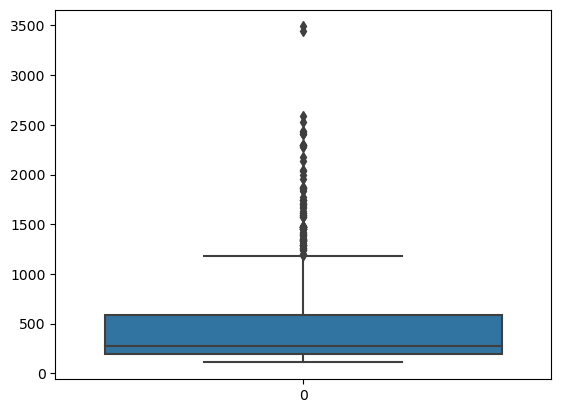

In [23]:
tmp=df.description.str.len()
sns.boxplot(tmp)

In [24]:
df.description.apply(lambda i : len(i))

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    1420
7b72c92c2f6c40268628ec5f14c6d590     444
64d5d4a258243731dc7bbb1eef49ad74    1258
d4684dcdc759dd9cdf41504698d737d8     858
6325b6870c54cd47be6ebfbffa620ec7    1197
                                    ... 
958f54f4c46b53c8a0a9b8167d9140bc    2432
fd6cbcc22efb6b761bd564c28928483c    1660
5912e037d12774bb73a2048f35a00009     262
c3edc504d1b4f0ba6224fa53a43a7ad6     210
f2f027ad6a6df617c9f125173da71e44     187
Name: description, Length: 1050, dtype: int64

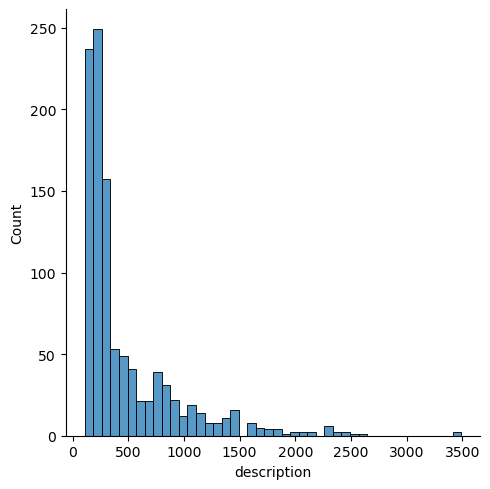

In [25]:
sns.displot(tmp)

### 2.2 Categories

Regardons en détail les catégories et leurs imbrications(sous-catégories)

In [26]:
# afficher le maximum de niveaux dans les imbrications de catégories 

cat_levels = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_levels = cat_levels.max()
print('il y a au maximum ', max_levels+1 , 'niveaux de catégories')

il y a au maximum  7 niveaux de catégories


In [27]:
df['product_category_tree'].sample(2)

uniq_id
d395b2f3d13ff8897f403c6141e0e39a                               ["Home Furnishing >> Bath Linen >> Towels"]
cd089e2ef349a7f00dcdbf28965914f6    ["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"]
Name: product_category_tree, dtype: object

Je récupére les catégories du 1er niveau 

In [28]:
# creation categorie
df['categorie'] = df.product_category_tree.apply(lambda x : x.split('>>')[0][2:].strip() )
df['categorie'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

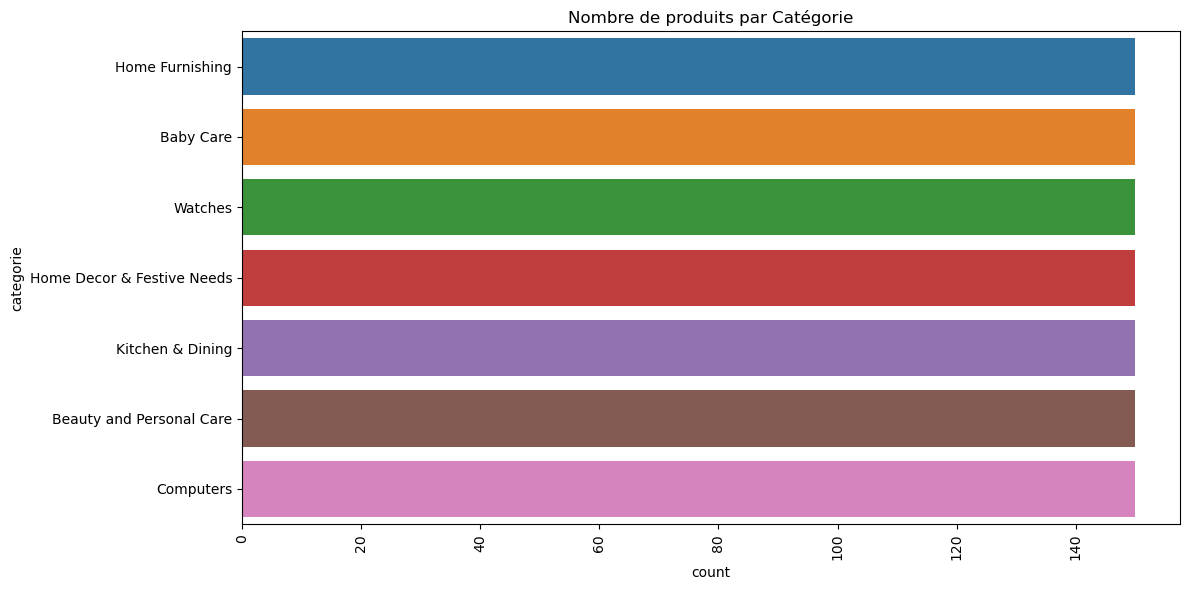

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, y='categorie', orient='h')
plt.xticks(rotation=90)
plt.title("Nombre de produits par Catégorie")
plt.tight_layout()
plt.savefig('repartition categorie.jpg')
plt.show()

In [30]:
df.head(1)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie
uniq_id,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstrac...",CRNEG7BKMFFYHQ8Z,1899.00,899.00,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value...",Home Furnishing


Je ne conserve que les 7 catégories pour la modelisation.


### 2.3. Dataset  for text analysis 

je conserve uniquement les données product_name , description et categorie,image .
l'index est le nom de la photo du produit (fichier . jpg)

In [31]:
# création dataframe de travail 
df_ = df[['product_name','categorie', 'description','image']]
df_.info()                        

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   categorie     1050 non-null   object
 2   description   1050 non-null   object
 3   image         1050 non-null   object
dtypes: object(4)
memory usage: 73.3+ KB


In [32]:
# creation d'un variable numerique pour la categorie
lbe = LabelEncoder()
df_['cat_num'] = lbe.fit_transform(df['categorie'])

# vérification
lbe.inverse_transform([0,1,2,3,4,5,6])

C:\Users\serge\AppData\Local\Temp\ipykernel_18300\1926301774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['cat_num'] = lbe.fit_transform(df['categorie'])


array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype=object)

In [33]:
df_.head(1)

,product_name,categorie,description,image,cat_num
uniq_id,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,Home Furnishing,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,4


#### 2. 3.1  Build raw corpus

Je crée le corpus à partir de la variable description 

In [34]:
# creation corpus
raw_corpus = ' '.join(df_['description'].values)
print("total nb of words in the whole corpus: ", len(raw_corpus.split()))

total nb of words in the whole corpus:  80013


In [35]:
len(raw_corpus)

498561

In [36]:
# afiche les 100ers caracteres
raw_corpus[:1000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [37]:
# stop word
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
print(stop_words)

{'through', 'any', "that'll", 'and', 'did', 'they', 'up', 'once', 'how', 'so', 'll', 'was', 'where', 'it', 'then', 'her', "hasn't", "you'll", 'what', 'having', 'an', 'now', 'his', 'wasn', 'this', 'its', "you'd", 'these', 'no', "wasn't", 'your', 'yours', 'whom', 'doing', 'hasn', 'again', 'them', 'will', 'than', 'for', 'the', "needn't", "hadn't", 'on', 'my', 'with', 'but', 'when', 'being', 'further', 'before', 'ma', 'myself', 'do', "don't", "haven't", 'me', 'just', 'which', "didn't", 'ain', "you're", 'during', 'theirs', 'been', 'mightn', 'shan', "won't", 'has', 'most', 'y', "it's", 's', 'ourselves', 'who', 'have', 'that', "you've", 'between', 'o', 'such', "shan't", 'after', 'in', 'only', 'yourself', 'won', 'about', 'both', 're', 'nor', 'isn', 'their', 'a', 'there', 'some', "isn't", 'from', 'over', 'ours', "she's", 'aren', 'mustn', 'weren', 'doesn', 'herself', 'same', "doesn't", "mustn't", 'why', 'm', 'don', 'be', 'd', 'didn', 'yourselves', 'at', 'out', "weren't", 'am', 'because', 'other'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def process_text_1(doc,rejoin=False):
    '''basic function of text processing'''
    
    # lower 
    doc=doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")             # on enlève la ponctuation avec r'\w+'
    raw_tokens_list=tokenizer.tokenize(doc)
    
    # stop words
    cleaned_tokens_list=[w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin :
        return " ".join[cleaned_tokens_list]
    
    return cleaned_tokens_list
    

In [39]:
sentence_sample=('The oldest lion was sleeping while the two youngers were playing !!')


In [40]:
#lower
sentence_lower=sentence_sample.lower().strip()
sentence_lower

'the oldest lion was sleeping while the two youngers were playing !!'

In [41]:
# tokenize les mots
tokenizer = RegexpTokenizer(r"\w+")             # on enlève la ponctuation avec r'\w+'
sentence_tokenized=tokenizer.tokenize(sentence_lower)
sentence_tokenized
    

['the',
 'oldest',
 'lion',
 'was',
 'sleeping',
 'while',
 'the',
 'two',
 'youngers',
 'were',
 'playing']

In [42]:
# remove stop words
sentence_no_stopw=[w for w in sentence_tokenized if w not in stop_words]
sentence_no_stopw

['oldest', 'lion', 'sleeping', 'two', 'youngers', 'playing']

In [43]:
# no more len words
min_len_word=3  
more_than_3=[w for w in sentence_no_stopw if len(w)>=min_len_word]
more_than_3

['oldest', 'lion', 'sleeping', 'two', 'youngers', 'playing']

In [44]:
# Stemming
trans=PorterStemmer()
stem_sample=[trans.stem(i)for i in more_than_3]
print(stem_sample)

['oldest', 'lion', 'sleep', 'two', 'younger', 'play']


In [45]:
#Lemmatization
import nltk
nltk.download('wordnet')
lemma=WordNetLemmatizer()
Lemm_sample=[lemma.lemmatize(i)for i in more_than_3]
Lemm_sample

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\serge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['oldest', 'lion', 'sleeping', 'two', 'youngers', 'playing']

In [46]:
def display_tokens_info(tokens):
    '''dysplay info about corpus'''
    
    print(f"nb tokens {len(tokens)},nb tokens uniques, {len(set(tokens))}")
    print(tokens[:100])

In [47]:
# process the corpus
corpus=process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61786,nb tokens uniques, 5966
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'makes', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'give

In [48]:
# value counts and  print first 20 common tokens
tmp=pd.Series(corpus).value_counts()
tmp.head(20)

rs                911
products          631
free              618
buy               581
delivery          567
genuine           564
cash              564
shipping          564
replacement       559
1                 554
cm                543
day               540
30                498
flipkart          481
com               473
guarantee         471
online            396
features          395
specifications    371
price             352
dtype: int64

In [49]:
tmp.describe()

count   5966.00
mean      10.36
std       39.98
min        1.00
25%        1.00
50%        2.00
75%        5.00
max      911.00
dtype: float64

#### 2.3.2 List rare tokens and minimum lenght of word

In [50]:
# words uniques-> pas utiles
list_unique_words=tmp[tmp==1]
# quantité de unique words
len(list_unique_words)

1940

In [51]:
# on récupére les mots uniques dans la list et on affiche les 10 premiers
list_unique_words=list(list_unique_words.index)
list_unique_words[:10]

['thigh',
 'voice',
 '240v',
 'flamingo',
 'vegetable',
 'enzyme',
 'luxarious',
 'of1',
 'everyday',
 'tinker']

In [52]:
# save it for later
tmp=pd.DataFrame({"words" :list_unique_words})
tmp.to_csv('C:\\Users/serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\analyse\\cleaned\\unique_word.csv',index=False)

In [53]:
## idem for words  5 fois ou moins
tmp=pd.Series(corpus).value_counts()
list_max_5_words=tmp[tmp<=5]
# nombre de mots avec occurence  5 
len(list_max_5_words)

4481

In [54]:
# save it for later
list_max_5_words=list(list_max_5_words.index)
tmp=pd.DataFrame({"words" :list_max_5_words})
tmp.to_csv('C:\\Users/serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\analyse\\cleaned/max_5_words.csv',index=False)

In [55]:
## idem for words minimum 10 fois
tmp=pd.Series(corpus).value_counts()
list_max_10_words=tmp[tmp<=10]
# nombre de mots avec occurence  10 
len(list_max_10_words)

5102

In [56]:
# save it for later
list_max_10_words=list(list_max_10_words.index)
tmp=pd.DataFrame({"words" :list_max_10_words})
tmp.to_csv('C:\\Users/serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\analyse\\cleaned/max_10_words.csv',index=False)

In [57]:
min_len_word=3
force_is_alpha=True
list_rare_words=list_unique_words  

#### 2.3.3 Only english words

In [58]:
eng_words=[i.lower()for i in words.words()]
len(set(words.words()))

235892

In [59]:
# lemmatisation
lm=WordNetLemmatizer()
eng_words_lem=[lm.lemmatize(i) for i in  eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736,nb tokens uniques, 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally', 'abaction', 'abactor', 'abaculus', 'abacus', 'abadite', 'abaff', 'abaft', 'abaisance', 'abaiser', 'abaissed', 'abalienate', 'abalienation', 'abalone', 'abama', 'abampere', 'abandon', 'abandonable', 'abandoned', 'abandonedly', 'abandonee', 'abandoner', 'abandonment', 'abanic', 'abantes', 'abaptiston', 'abarambo', 'abaris', 'abarthrosis', 'abarticular', 'abarticulation', 'aba', 'abase', 'abased', 'abasedly', 'abasedness', 'abasement', 'abaser', 'abasgi', 'abash', 'abashed', 'abashedly', 'abashedness', 'abashless', 'abashlessly', 'abashment', 'abasia', 'abasic', 'abask', 'abassin', 'abastardize', 'abatable', 'abate', 'abatement', 'abater', 'abatis', 'ab

In [60]:
# stemming
ps=PorterStemmer()
eng_words_stem=[ps.stem(i) for i in  eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736,nb tokens uniques, 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin', 'abact', 'abactor', 'abaculu', 'abacu', 'abadit', 'abaff', 'abaft', 'abais', 'abais', 'abaiss', 'abalien', 'abalien', 'abalon', 'abama', 'abamper', 'abandon', 'abandon', 'abandon', 'abandonedli', 'abandone', 'abandon', 'abandon', 'aban', 'abant', 'abaptiston', 'abarambo', 'abari', 'abarthrosi', 'abarticular', 'abarticul', 'aba', 'abas', 'abas', 'abasedli', 'abased', 'abas', 'abas', 'abasgi', 'abash', 'abash', 'abashedli', 'abashed', 'abashless', 'abashlessli', 'abash', 'abasia', 'abas', 'abask', 'abassin', 'abastard', 'abat', 'abat', 'abat', 'abat', 'abati', 'abatis', 'abaton', 'abat', 'abattoir', 'abatua', 'abatur', 'abav', 'abaxi', 'abaxil', 'abaz', 'abb', 'abba', 'abbacom',

In [61]:
def process_text(doc,
                  rejoin=True,
                  lemm_or_stemm="stem",
                  list_rare_words=None,
                  min_len_word=3,
                  eng_words=None,
                  extra_words=None) :
                  
    """ exclude an extra list of words
    
    positional arguments:
    ---------------------
    doc: str : the document ( a test in str format) to process
    
    opt args:
    ---------
    rejoin : if True return a string else return the list of tokens
    extra_words : a list of duplicated words to exclude
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : a list of rare words to exclude
    min_len_words : the minimum length of words to not ecxlude
    force_is_alpha : int : if 1 exlude all tokens with numeric caracter
    eng_words : list of english words
    return :
    ---------
    a string if rejoin is true else a list of tokens
    """
    
    #list unique words
    if not list_rare_words:
        list_rare_words=[]
        
    # extra words
    if not extra_words:
        extra_words=[]
        
    #lower and strip
    doc=doc.lower().strip()
    
                                 
        
    tokenizer=RegexpTokenizer(r"\w+")
    raw_tokens_list=tokenizer.tokenize(doc)
    
    #remove stop words
    cleaned_tokens_list=[w for w in raw_tokens_list if w not in stop_words]
    
    #drop rare tokens
    non_rare_tokens_list =[w for w in cleaned_tokens_list if w not in list_rare_words]
    
    
    # keep only word > N
    more_than_N=[w for w in non_rare_tokens_list if len(w)>=3]
    
    
    # keep only alpha words not num
    alpha_num=[w for w in more_than_N if w.isalpha()]
   
      
    # stem or lem
    if lemm_or_stemm=="lem":
        trans=WordNetLemmatizer()
        trans_text=[trans.lemmatize(i)for i in alpha_num]
        
    else:
        trans=PorterStemmer()
        trans_text=[trans.stem(i)for i in alpha_num]
          
            
    # in english
    
    if eng_words :
        engl_text=[i for i in trans_text if i in eng_words]
        
        engl_text=trans_text
        
    ###################################################################
    ###################################################################
    
        # drop extra_words tokens
     
    final=[w for w in engl_text if w not in extra_words] 
    
    ##################################################################
    ##################################################################
    
    # return a list or string
    
    if rejoin :
        return " ".join(final)
    return engl_text


In [62]:
corpus = process_text(raw_corpus,
                       rejoin=False,
                       list_rare_words=list_unique_words,
                       eng_words=eng_words_stem)
display_tokens_info(corpus)

nb tokens 51562,nb tokens uniques, 2748
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest', 'fabric', 'featur', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environ', 'curtain', 'ant', 'wrinkl', 'anti', 'shrinkag', 'eleg', 'give', 'home', 'bright', 'appeal', 'design', 'attent', 'sure', 'contemporari', 'eyelet', 'curtain', 'slide', 'smoothli', 'draw', 'apart', 'first', 'thing', 'morn', 'welcom', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morn', 'whole', 'world', 'draw', 'even', 'creat', 'special', 'moment', 'beauti', 'given', 'sooth', 'print', 'bring', 'home', 'eleg', 'curtain', 'light', 'room', 'get', 'right', 'amount', 'sunlight', 'specif', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']


In [63]:
len(list_unique_words)

1940

In [64]:
# affiche les 10 ers mots
list_unique_words[:10]

['thigh',
 'voice',
 '240v',
 'flamingo',
 'vegetable',
 'enzyme',
 'luxarious',
 'of1',
 'everyday',
 'tinker']

In [65]:
list_max_5_words[:5]

['mentioned', 'filled', 'maintenance', 'movies', 'boxes']

In [66]:
## on relance la fonction avec list_max_5_words
corpus = process_text(raw_corpus,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)
display_tokens_info(corpus)

nb tokens 45725,nb tokens uniques, 1103
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest', 'fabric', 'featur', 'eyelet', 'style', 'metal', 'ring', 'make', 'room', 'curtain', 'anti', 'eleg', 'give', 'home', 'bright', 'appeal', 'design', 'sure', 'contemporari', 'eyelet', 'curtain', 'first', 'morn', 'bright', 'want', 'good', 'morn', 'whole', 'world', 'creat', 'special', 'beauti', 'print', 'bring', 'home', 'eleg', 'curtain', 'light', 'room', 'get', 'right', 'specif', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'gener', 'brand', 'eleg', 'design', 'door', 'type', 'eyelet', 'model', 'name', 'abstract', 'polyest', 'door', 'curtain', 'set', 'model', 'color', 'multicolor', 'dimens', 'length', 'box']


#### 2.3.4 Wordcloud

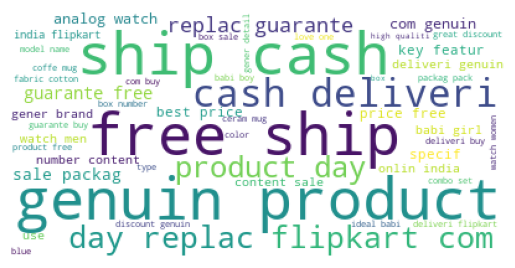

In [67]:
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud.png")
plt.show();

#### 2.3.5 Visualisation des corpus

In [68]:
df_['categorie'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [69]:
# séparer les lignes de la dataframe en fonction des targets
df_0 = df_[df_.categorie=='Home Furnishing']
df_1 = df_[df_.categorie=='Baby Care']
df_2 = df_[df_.categorie=='Watches']
df_3 = df_[df_.categorie=='Home Decor & Festive Needs']
df_4 = df_[df_.categorie=='Kitchen & Dining'] 
df_5 = df_[df_.categorie=='Beauty and Personal Care'] 
df_6 = df_[df_.categorie=='Computers']     

In [70]:
# créer les corpus 
corpus_6=" ".join(df_6.description)
corpus_5=" ".join(df_5.description)
corpus_4=" ".join(df_4.description)
corpus_3=" ".join(df_3.description)
corpus_2=" ".join(df_2.description)
corpus_1=" ".join(df_1.description)
corpus_0=" ".join(df_0.description)

In [71]:
### appliquer la méthode de réduction de dimension sur chaque corpus
corpus_6 = process_text(corpus_6,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)

corpus_5 = process_text(corpus_5,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)

corpus_4 = process_text(corpus_4,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)
corpus_3 = process_text(corpus_3,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)
corpus_2 = process_text(corpus_2,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)
corpus_1 = process_text(corpus_1,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)
corpus_0 = process_text(corpus_0,
                       rejoin=False,
                       list_rare_words=list_max_5_words,
                       eng_words=eng_words_stem)

In [72]:
corpus_0[:10]

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral']

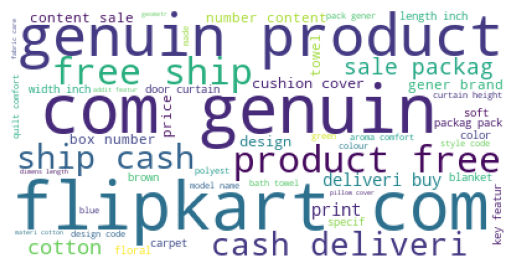

In [73]:
### visualisation de corpus_0
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud0.png")
plt.show();

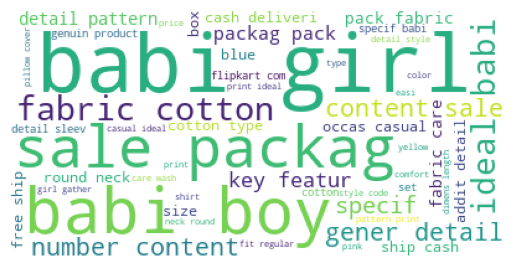

In [74]:
### visualisation de corpus_1
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud1.png")
plt.show();

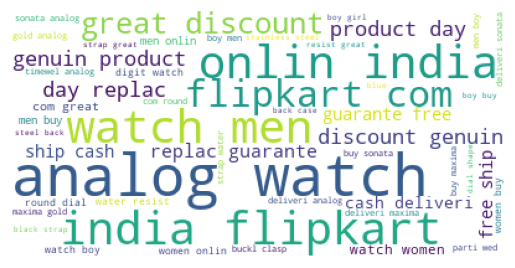

In [75]:
### visualisation de corpus_2
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_2))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud2.png")
plt.show();

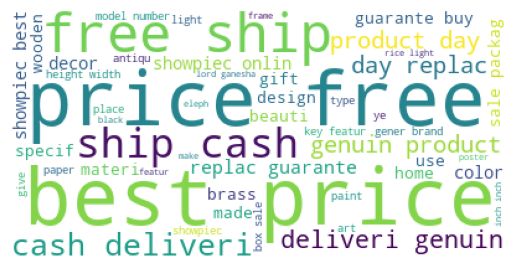

In [76]:
### visualisation de corpus_3
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_3))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud3.png")
plt.show();

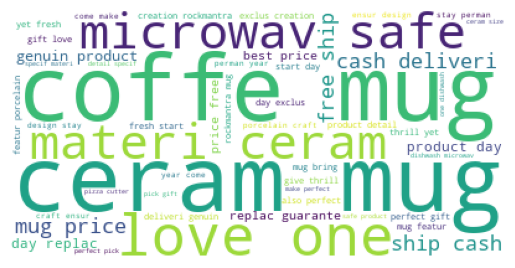

In [77]:
### visualisation de corpus_4
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_4))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud4.png")
plt.show();

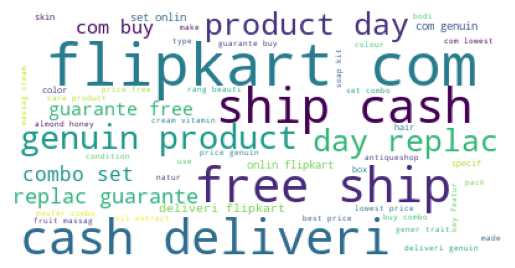

In [78]:
### visualisation de corpus_5
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud5.png")
plt.show();

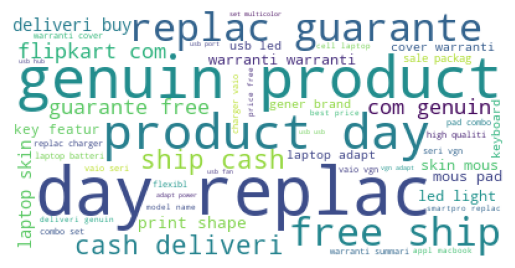

In [79]:
### visualisation de corpus_6
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate(" ".join(corpus_6))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud6.png")
plt.show();

In [80]:
## on regarde les  mots communs aux 1000 mots les plus courants de chaque corpus
n=1000
doublons=[i for i in pd.Series(corpus_0).value_counts().head(n).index
         if i in pd.Series(corpus_1).value_counts().head(n).index
         if i in pd.Series(corpus_2).value_counts().head(n).index
         if i in pd.Series(corpus_3).value_counts().head(n).index
         if i in pd.Series(corpus_4).value_counts().head(n).index
         if i in pd.Series(corpus_5).value_counts().head(n).index
         if i in pd.Series(corpus_6).value_counts().head(n).index]

display_tokens_info(doublons)

nb tokens 79,nb tokens uniques, 79
['cover', 'design', 'pack', 'product', 'buy', 'free', 'genuin', 'ship', 'cash', 'deliveri', 'flipkart', 'comfort', 'color', 'packag', 'sale', 'materi', 'price', 'featur', 'brand', 'width', 'specif', 'dimens', 'box', 'gener', 'number', 'set', 'content', 'type', 'style', 'qualiti', 'height', 'key', 'made', 'look', 'blue', 'green', 'beauti', 'black', 'use', 'size', 'weight', 'high', 'colour', 'long', 'white', 'pink', 'back', 'shape', 'come', 'day', 'bodi', 'add', 'suitabl', 'ye', 'ideal', 'durabl', 'place', 'india', 'red', 'make', 'well', 'one', 'great', 'world', 'life', 'new', 'water', 'rang', 'light', 'manufactur', 'sure', 'replac', 'multi', 'get', 'vari', 'may', 'finish', 'like', 'touch']


#### 2.3.6 dataset cleaned 
on exclut les mots communs aux 7 corpus trouvés dans les 1000 mots les plus présents de chaque corpus
On relance la fonction en écartant les doublons

In [81]:
def final_clean(doc) :
    
    """ finaliser la fonction finale"""
    
    new_doc=process_text(doc,
                          rejoin=True,
                          lemm_or_stemm="stem",
                          list_rare_words=list_max_5_words,
                          eng_words=eng_words_stem,
                          extra_words=doublons) 
    return new_doc
                  

In [82]:
df_['clean_description']=df_.description.apply(final_clean)

C:\Users\serge\AppData\Local\Temp\ipykernel_18300\120054209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['clean_description']=df_.description.apply(final_clean)


Je sépare à nouveau les différentes catégories avec le corpus nettoyé des mots communs à chaque catégorie

In [83]:
# séparer les lignes de la dataframe avec target = 0 de target = 1
df_0 = df_[df_.categorie=='Home Furnishing']
df_1 = df_[df_.categorie=='Baby Care']
df_2 = df_[df_.categorie=='Watches']
df_3 = df_[df_.categorie=='Home Decor & Festive Needs']
df_4 = df_[df_.categorie=='Kitchen & Dining'] 
df_5 = df_[df_.categorie=='Beauty and Personal Care'] 
df_6 = df_[df_.categorie=='Computers']     

In [76]:
# créer les corpus 
corpus_6=" ".join(df_6.clean_description)
corpus_5=" ".join(df_5.clean_description)
corpus_4=" ".join(df_4.clean_description)
corpus_3=" ".join(df_3.clean_description)
corpus_2=" ".join(df_2.clean_description)
corpus_1=" ".join(df_1.clean_description)
corpus_0=" ".join(df_0.clean_description)

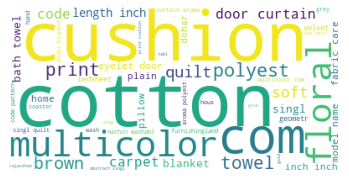

In [77]:
### visualisation de corpus_0
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud0_clean.png")
plt.show();

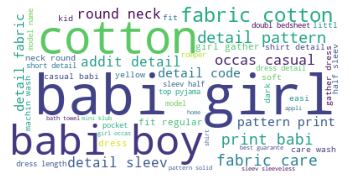

In [78]:
### visualisation de corpus_1
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud1_clean.png")
plt.show();

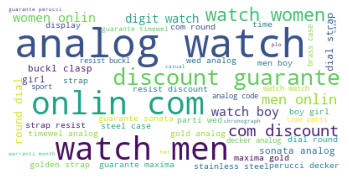

In [79]:
### visualisation de corpus_2
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_2))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud2_clean.png")
plt.show();

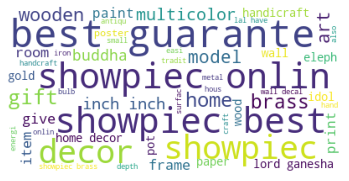

In [80]:
### visualisation de corpus_3
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_3))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud3_clean.png")
plt.show();

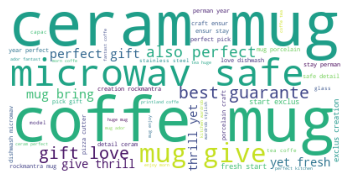

In [81]:
### visualisation de corpus_4
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_4))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud4_clean.png")
plt.show();

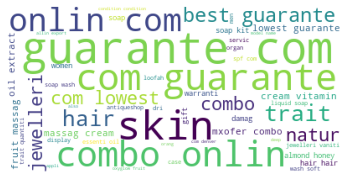

In [82]:
### visualisation de corpus_5
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud5_clean.png")
plt.show();

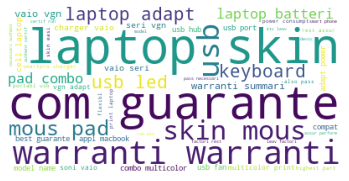

In [83]:
### visualisation de corpus_6
wordcloud=WordCloud(background_color ='white',
                   stopwords=[],
                   max_words=50).generate("".join(corpus_6))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("C:\\Users\\serge\\oneDrive\\Documents\\Documents\\DATA SCIENTIST\\P6\\pictures\\Workcloud6_clean.png")
plt.show();

Résumé des actions réalisées sur le corpus

1. Création du corpus constitué des différentes lignes de la colonne description. 
2. Le corpus a été préprocessé : tokenizer , lower , word_length(3) , stopwords , list_max_5_words,  stemming
3. les mots communs aux 1000 premiers mots de chaque catégorie ont été enlevés 
4. la variable clean_description a été ajoutée dans le dataframe

l'analyse visuelle des graphiques Workcloud nous renseigne sur la faisabilité d'une classification des produits sur base de la description.



In [84]:
df_.head(1)

,product_name,categorie,description,image,cat_num,clean_description
uniq_id,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,Home Furnishing,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,4,eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abst...


In [85]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       1050 non-null   object
 1   categorie          1050 non-null   object
 2   description        1050 non-null   object
 3   image              1050 non-null   object
 4   cat_num            1050 non-null   int32 
 5   clean_description  1050 non-null   object
dtypes: int32(1), object(5)
memory usage: 85.6+ KB


In [86]:
df_.to_csv(r'C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P6\df_clean.csv',index=True)